#1. Importar bibliotecas necessárias

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#2. Definir funções

In [87]:
def plotar_grafico_barras(df, coluna, titulo, ylabel, ignoreFirst):
    plt.figure(figsize=(10, 6))
    # Exibindo os valores nas barras
    if ignoreFirst:
        df_filtered = df.iloc[1:]
        bars = plt.bar(df_filtered['NumThreads'], df_filtered[coluna], color='lightgreen', width=0.6)
    else:
        bars = plt.bar(df['NumThreads'], df[coluna], color='lightgreen', width=0.6)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 6), ha='center', va='bottom')

    plt.xlabel('Número de Threads')
    plt.ylabel(ylabel)
    plt.title(titulo)
    plt.xticks(df['NumThreads'])
    plt.show()

def plotar_tabela(df, titulo):
    plt.figure(figsize=(10, 2))
    # Oculta o eixo
    plt.axis('off')
    plt.axis('tight')

    # Adiciona a tabela ao gráfico
    table = plt.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

    plt.title(titulo)

def format_number(num):
    if isinstance(num, (int, float)):
        return f'{num:.4f}' if num % 1 != 0 else f'{int(num)}'
    return num

def completar_dados(df):
    # Completa os valores faltantes com a média dos tempos
    df['Media'] = df[['tempo1', 'tempo2', 'tempo3', 'tempo4', 'tempo5', 'tempo6', 'tempo7', 'tempo8', 'tempo9', 'tempo10']].mean(axis=1)

    # Calcula o speedup
    media_sequencial = df[df['NumThreads'] == 1]['Media'].values[0]
    df['TempoSequencial'] = media_sequencial
    df['Speedup'] = df['TempoSequencial'] / df['Media']

    # Calcula a eficiência
    df['Eficiencia'] = df['Speedup']/df['NumThreads']

    # Calcula a métrica de Karp-Flat
    df['MetricaKarpFlat'] = ((1/df['Speedup']) - (1/df['NumThreads']))/(1 - (1/df['NumThreads']))

    return df

#3. Importar dados gerados pelo bash script

In [26]:
# Leitura do arquivo CSV
from google.colab import files
# Fazer upload do arquivo
uploaded = files.upload()

df_omp = pd.read_csv('dados-omp.csv', sep='\s', engine='python')

df_omp

df_omp = completar_dados(df_omp)

Saving dados-omp.csv to dados-omp.csv


,NumThreads,tempo1,tempo2,tempo3,tempo4,tempo5,tempo6,tempo7,tempo8,tempo9,tempo10
0,1,0.019344,0.020576,0.020532,0.019612,0.019804,0.019211,0.019492,0.019745,0.019525,0.019339
1,2,0.010224,0.010102,0.010835,0.010592,0.010157,0.010455,0.009821,0.010658,0.010297,0.010142
2,4,0.005577,0.005788,0.007372,0.005507,0.005622,0.005855,0.007026,0.007057,0.007008,0.005756
3,8,0.004448,0.003890,0.007162,0.004912,0.003975,0.004633,0.004120,0.004028,0.003880,0.003875
4,16,0.005102,0.004183,0.004452,0.005331,0.005089,0.004140,0.005349,0.004708,0.004308,0.005795


#4. Plotar gráficos

##Gráfico mostrando a média dos tempos gastos

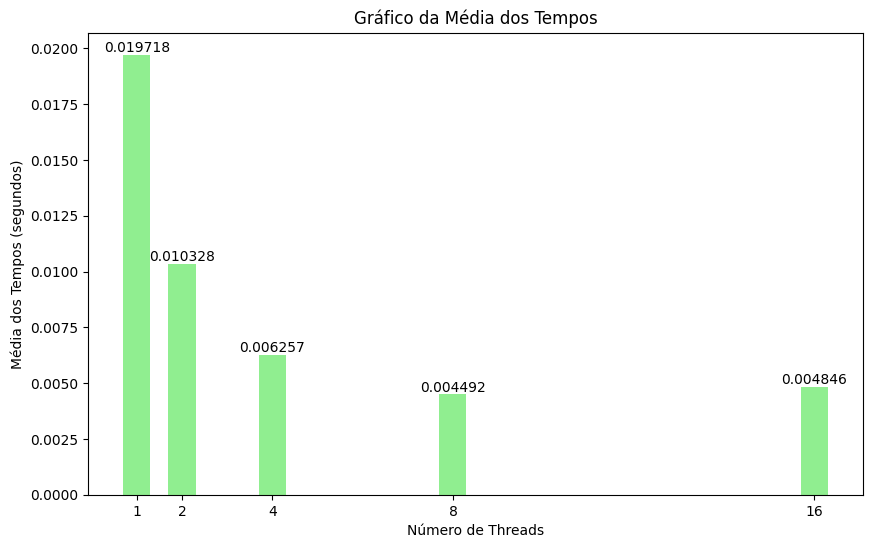

In [89]:
plotar_grafico_barras(df_omp, 'Media', 'Gráfico da Média dos Tempos', 'Média dos Tempos (segundos)', False)

##Gráfico do Speedup

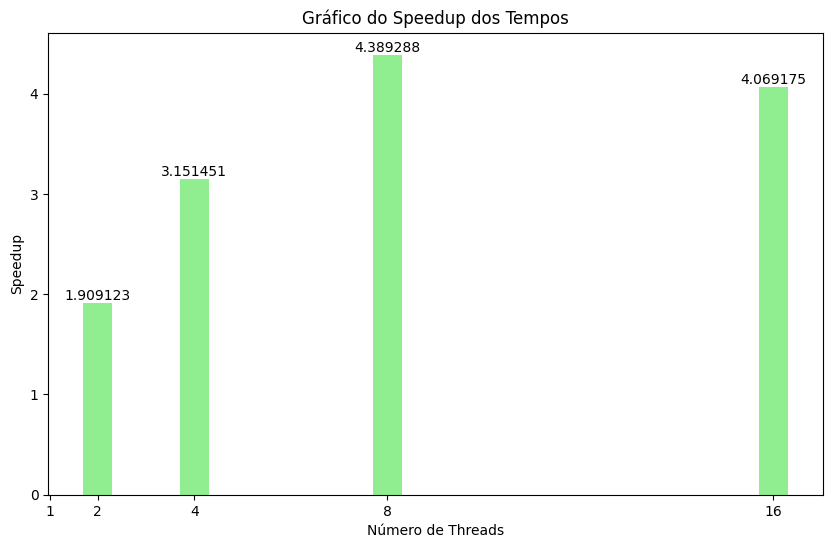

In [90]:
plotar_grafico_barras(df_omp, 'Speedup', 'Gráfico do Speedup dos Tempos', 'Speedup', True)

##Gráfico da eficiência

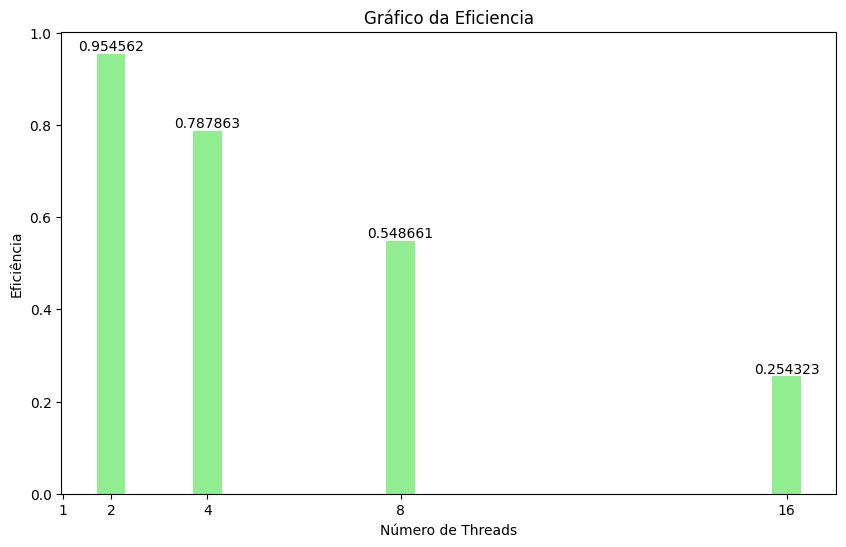

In [91]:
plotar_grafico_barras(df_omp, 'Eficiencia', 'Gráfico da Eficiencia', 'Eficiência', True)

##Tabela mostrando o resultado da métrica de Karp-Flat

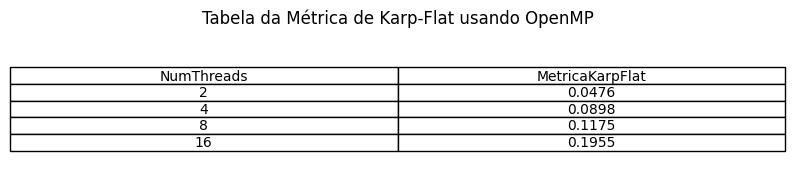

In [88]:
# KarpFlat_df = df[df['NumThreads'] != 1][['N', 'NumThreads', 'MetricaKarpFlat']].map(format_number)
KarpFlat_df_omp = df_omp[df_omp['NumThreads'] != 1][['NumThreads', 'MetricaKarpFlat']].copy()
KarpFlat_df_omp['MetricaKarpFlat'] = KarpFlat_df_omp['MetricaKarpFlat'].map(format_number)
plotar_tabela(KarpFlat_df_omp, 'Tabela da Métrica de Karp-Flat')